In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
soccer = cv2.cvtColor(cv2.resize(cv2.imread('nao_images_test/cancha5.png'), (32, 32)), cv2.COLOR_BGR2RGB) / 255
desks = cv2.cvtColor(cv2.resize(cv2.imread('nao_images_test/desk6.png'), (32, 32)), cv2.COLOR_BGR2RGB) / 255
exit = cv2.cvtColor(cv2.resize(cv2.imread('nao_images_test/salida.png'), (32, 32)), cv2.COLOR_BGR2RGB) / 255
#office = cv2.cvtColor(cv2.resize(cv2.imread('office2.jpg'), (32, 32)), cv2.COLOR_BGR2RGB) / 255


In [85]:
print(soccer.shape)

(32, 32, 3)


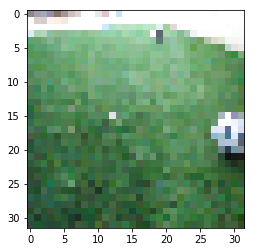

In [86]:
plt.imshow(soccer)

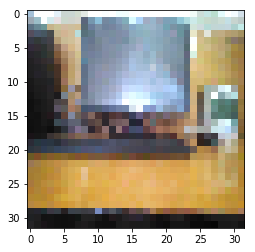

In [87]:
plt.imshow(desks)

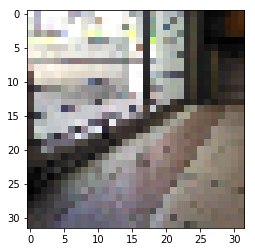

In [88]:
plt.imshow(exit)

In [89]:
predicted = ["desks", "exit", "office", "soccer_court"]

In [90]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('best_model/image_classifier.ckpt.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./best_model/'))
    graph = tf.get_default_graph()
    y_pred = graph.get_tensor_by_name("y_pred:0")
    x = graph.get_tensor_by_name("input_x:0")
    #hold_prob = graph.get_tensor_by_name("hold_prob_dropout:0")
    
    pred = sess.run(y_pred, feed_dict={x:[soccer]})
    print("Probabilities")
    print(sess.run(tf.nn.softmax(pred)))
    pred_cast = sess.run(tf.cast(sess.run(tf.argmax(pred[0])), tf.int32))
    print("For soccer image model predict: {}".format(predicted[pred_cast]))
    
    pred = sess.run(y_pred, feed_dict={x:[desks]})
    print("Probabilities")
    print(sess.run(tf.nn.softmax(pred)))
    pred_cast = sess.run(tf.cast(sess.run(tf.argmax(pred[0])), tf.int32))
    print("For desk image model predict: {}".format(predicted[pred_cast]))
    
    pred = sess.run(y_pred, feed_dict={x:[exit]})
    print("Probabilities")
    print(sess.run(tf.nn.softmax(pred)))
    pred_cast = sess.run(tf.cast(sess.run(tf.argmax(pred[0])), tf.int32))
    print("For exit image model predict: {}".format(predicted[pred_cast]))
    
#     pred = sess.run(y_pred, feed_dict={x:[office], hold_prob:1.0})
#     print("Probabilities")
#     print(sess.run(tf.nn.softmax(pred)))
#     pred_cast = sess.run(tf.cast(sess.run(tf.argmax(pred[0])), tf.int32))
#     print("For office model predict: {}".format(predicted[pred_cast]))


INFO:tensorflow:Restoring parameters from ./best_model/image_classifier.ckpt
Probabilities
[[4.3234532e-03 1.9385539e-04 5.2254245e-07 9.9548209e-01]]
For soccer image model predict: soccer_court
Probabilities
[[5.2934027e-01 4.6922559e-01 1.3687714e-03 6.5335997e-05]]
For desk image model predict: desks
Probabilities
[[6.2380554e-05 1.9711517e-04 5.3963739e-01 4.6010315e-01]]
For exit image model predict: office
